# Exploratory Data Analysis

**Project:** Income Predictors

**Team:** Team 1 C4: Masha Bystritskii & Sara Mahmoud

**Date:** February 19th, 2026




## Table of Contents
1. Setup & Load Data
2. Data Quality Check
3. Target Variable Analysis
4. Feature Distributions
5. Correlation Analysis
6. Key Findings Summary



## 1. Setup & Load Data

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)

print("✓ Libraries loaded!")

✓ Libraries loaded!


In [13]:
# Load raw data
# TODO: Update the file path to your dataset
df = pd.read_csv('adult.data', names=columns, skipinitialspace=True)

df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K



## 2. Data Quality Check

**Questions to answer:**
- What are the data types?
- Are there missing values?
- Are there duplicate rows?

In [15]:
df.shape

(32561, 15)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [19]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [21]:
df.duplicated().sum()

24

In [23]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Data Quality Observations

*TODO: Write your observations here*

1. **Data types:** The dataset contains 32,561 rows and 15 columns. There are 6 numeric variables (age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week) and 9 categorical variables, workclass, education, marital_status, occupation, race, sex, native_country, income).

2. **Missing values:**missing NaN values were detected using df.isnull(). Howe an issue I found is thatver, this dataset represents missing values as "?" in certain categorical columns, which will need to be handled during preprocessing.

3. **Duplicates:** There are 24 duplicate rows in the dataset.

4. **Potential issues:** 
   - capital_gain has a maximum value of 99,999 and capital_loss has a maximum of 4,356, indicating extreme outliers.
   - hours_per_week ranges from 1 to 99 hours, which may contain unrealistic values.
   - Categorical variables will require encoding before modeling.



## 3. Target Variable Analysis

**Your target variable:** [TODO: What are you trying to predict?]

<Axes: xlabel='income'>

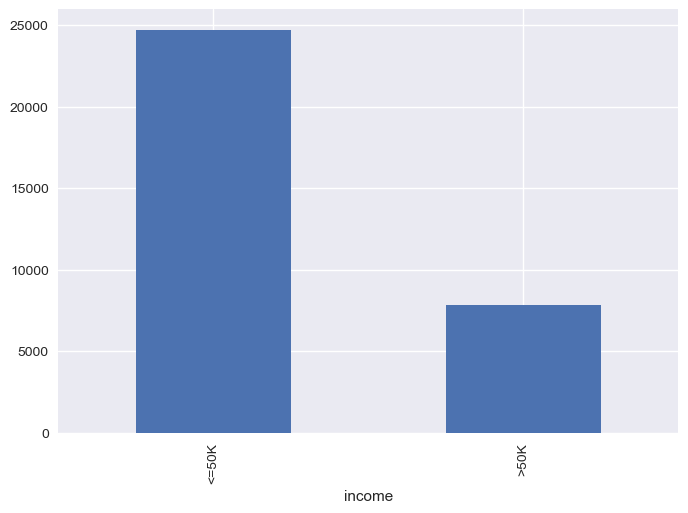

In [32]:
df['income'].value_counts()
df['income'].value_counts().plot(kind='bar')

### Target Variable Observations

*TODO: Write your observations here*

1. **Distribution shape:** The target variable contains two categori beings: <=50K and >50K.

2. **Class counts:** There are 24,720 individuals earning <=50K and 7,841 individuals earning >50K.

3. **Class balance:** The dataset is imbalanced, with approximately 76% of individuals earning <=50K and 24% earning >50K.

4. **Potential issues:** Class imbalance may bias a model toward predicting the majority class (<=50K), so evaluation metrics beyond  ( (e.g., precision, recall) will be important in later stages.



## 4. Feature Distributions

### Feature Distribution Observations

*TODO: Write your observations here*




## 5. Correlation Analysis

### Correlation Observations

*TODO: Write your observations here*

1. **Strongest predictor:** ...
2. **Other important features:** ...
3. **Multicollinearity concerns:** ...


## 6. Key Findings Summary

## EDA Checklist

Before moving to modeling, ensure you've completed:

- [ ] Loaded and examined the data
- [ ] Checked data types
- [ ] Identified and documented missing values
- [ ] Analyzed target variable distribution
- [ ] Examined feature distributions
- [ ] Created correlation analysis
- [ ] Documented key findings
- [ ] Identified potential data quality issues